# Loading Data and libraries 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set display options
pd.set_option('display.max_columns', None)

# Load the data
data = pd.read_csv("C:/Users/Kateryna.Tekmenzhi/OneDrive - Bellevue College/data.csv", sep=";")

In [7]:
# Check basic information
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)

Dataset shape: (4424, 37)

Data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date          

4,424 student records with 37 variables each


In [9]:
# View first few rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2          

In [10]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                

In [11]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

Data contains no missing values 

In [12]:
# Target variable distribution
print("\nTarget variable distribution:")
print(data['Target'].value_counts())
print(data['Target'].value_counts(normalize=True).round(3) * 100)


Target variable distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target
Graduate    49.9
Dropout     32.1
Enrolled    17.9
Name: proportion, dtype: float64


4,424 students split into 
Graduate  (2,209 students  49.9%) 
Dropout   (1,421 students  32.1%)
Enrolled  (794 students    17.9%)

C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_17900\293437386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})


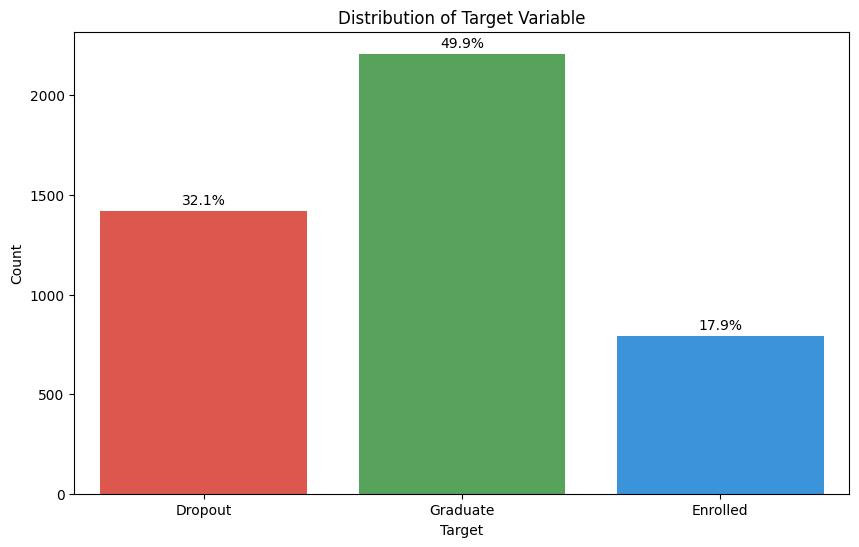

In [14]:
# Visualize target distribution with percentages and custom colors
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=data, palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})
plt.title('Distribution of Target Variable')
plt.ylabel('Count')

# Add percentage labels
for i, p in enumerate(plt.gca().patches):
    percentage = 100 * p.get_height() / len(data)
    plt.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2., p.get_height() + 30), ha='center')

plt.savefig('target_distribution.png')
plt.show()


Marital status:
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


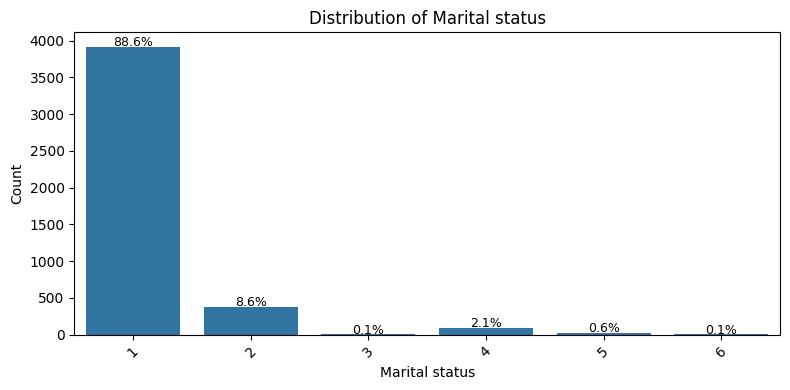


Gender:
Gender
0    2868
1    1556
Name: count, dtype: int64


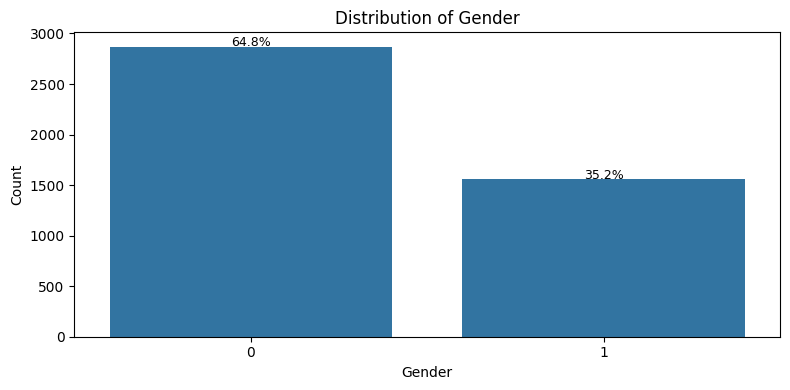


Scholarship holder:
Scholarship holder
0    3325
1    1099
Name: count, dtype: int64


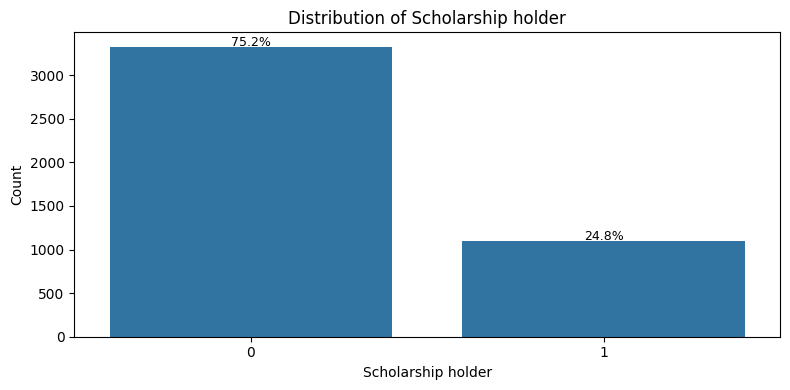


Daytime/evening attendance	:
Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64


C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_17900\3390931361.py:37: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kateryna.Tekmenzhi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


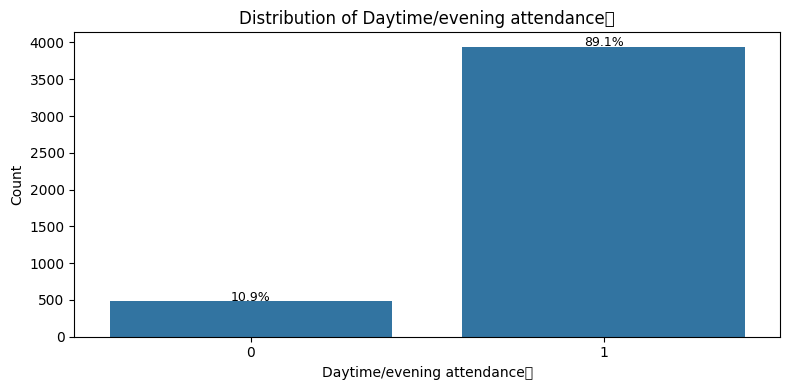

C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_17900\3390931361.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette=palette)



Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


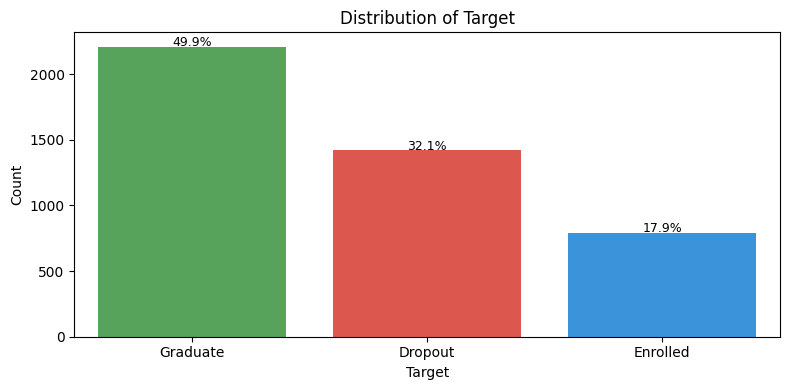


Target variable distribution:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_17900\3390931361.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette=palette)


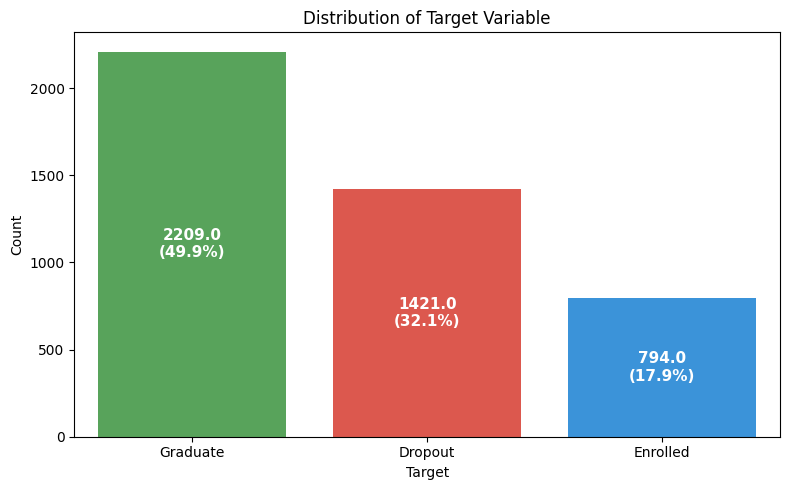

In [ ]:
# Get unique values and counts for key categorical variables with visualizations
categorical_vars = ['Marital status', 'Gender', 'Scholarship holder', 
                   'Daytime/evening attendance\t', 'Target']

for var in categorical_vars:
    # Print value counts
    print(f"\n{var}:")
    counts = data[var].value_counts()
    print(counts)
    
    # Create plot in console
    plt.figure(figsize=(8, 4))
    
    # Choose different color palette based on variable type
    if var == 'Target':
        palette = {'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'}
        ax = sns.barplot(x=counts.index, y=counts.values, palette=palette)
    else:
        ax = sns.barplot(x=counts.index, y=counts.values)
    
    # Add percentage labels
    total = len(data[var])
    for i, p in enumerate(ax.patches):
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width()/2., p.get_height() + 5), 
                    ha='center', fontsize=9)
    
    plt.title(f'Distribution of {var}')
    plt.ylabel('Count')
    plt.xticks(rotation=45 if len(counts) > 5 else 0)
    plt.tight_layout()
    plt.show()

# For plotting distribution of Target separately with more detail
print("\nTarget variable distribution:")
target_counts = data['Target'].value_counts()
target_percentages = data['Target'].value_counts(normalize=True) * 100
print(target_percentages)

plt.figure(figsize=(8, 5))
palette = {'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'}
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette=palette)

# Add count and percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}\n({target_percentages.iloc[i]:.1f}%)', 
                (p.get_x() + p.get_width()/2., height/2), 
                ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.title('Distribution of Target Variable')
plt.ylabel('Count')
plt.tight_layout()
plt.show()